# Régression Linéaire from scratch

Nous allons recoder la régression linéaire 

## Imports

In [14]:
import numpy as np 
from sklearn.datasets import make_regression #pour créer un dataset
import matplotlib.pyplot as plt

## Dataset

- **Dataset** : *(x,y)* avec *m* (lignes) exemples, et *n* (colonne) variable

In [15]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
                    # n_exemples=100, n_variable=1, ajout de bruit  

Text(0, 0.5, 'axe des Y')

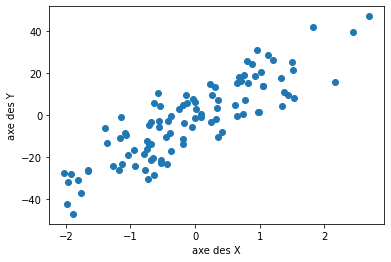

In [16]:
plt.scatter(x, y)

plt.xlabel("axe des X")
plt.ylabel("axe des Y")

### Matrices
-  Vérifier les dimensions des matrices ... toujours !

In [17]:
x.shape, y.shape


((100, 1), (100,))

- Nous allons redimensionner *y*, car parfois comme ici il n'affiche pas les dimensions lorsqu'il n'y a qu'une colonne.  

In [18]:
y = y.reshape(y.shape[0], 1)

x.shape, y.shape

((100, 1), (100, 1))

- pour créer notre Matrice *X* nous allons rajouter 1 colonne de Biais à notre matrice *x*

In [19]:
# matrice X
X = np.hstack((x, np.ones(x.shape)))
    # np.hstack permet de coller 2 vecteurs côte à côte

In [20]:
X.shape

(100, 2)

Nous avons bien ajouté 1 colonne de Biais (1) à notre matrice X

In [32]:
# affiche les 5 premières lignes
X[:5, :]

array([[-0.6426534 ,  1.        ],
       [ 1.02600613,  1.        ],
       [ 0.32340104,  1.        ],
       [ 0.09453971,  1.        ],
       [ 0.88578536,  1.        ]])

### Initialisation des Paramètres 
Notre modéle de Régression est linéaire il aura donc 2 paramètres, a et b
il seront contenue dans la matrice *theta*

In [49]:
# 2 élem, a et b, 2 lignes(m) et 1 colonne(n)
param_theta = np.random.randn(2, 1)

In [36]:
param_theta.shape

(2, 1)

In [50]:
param_theta

array([[ 0.35396518],
       [-0.44057919]])

## Le Modèle 
**La régréssion linéaire**

> Notre modèle : $$f(x) = ax + b$$

> Sous forme matriciel : $$F = X.\theta$$

- Définie notre modèle dans une fct

In [38]:
def model(X, param):
    
    return X.dot(param)

- On peut ensuite l'appliquer à nos données 

Text(0, 0.5, 'axe des Y')

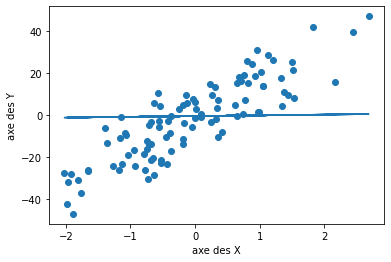

In [51]:
# nuage de point de nos données
plt.scatter(x, y)

# Notre modèle avec des paramètres aléatoires
plt.plot(x, model(X, param_theta))

plt.xlabel("axe des X")
plt.ylabel("axe des Y")

## La fonction Coût

> Fonction coût : $$J(a,b) = \frac{1}{2m} \sum_{i=1}^{m} (a.x^{(i)} -y^{(i)})^2$$
> Fonction coût sous forme matriciel : $$J(\theta) = \frac{1}{2m} \sum (X.\theta - Y)^2$$

In [52]:
def cost_function(X, y, param):
    
    m = len(y) # ici 100 exemple dans notre dataset
    
    return 1/(2*m) * np.sum((model(X, param) -y)**2)
    

In [53]:
cost_function(X, y, param_theta)

173.32570756272838